In [56]:
import numpy as np
import os
import PIL
import tensorflow as tf

In [57]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Main directory that includes training and validation directories
#main_dir = '../Data/Obesebackup/'
#training_path = os.path.join (main_dir,'train')
#validation_path = os.path.join (main_dir,'val')
#test_path = os.path.join (main_dir,'test')

PATH = os.path.join('../Data/agebackup3/')

CHANNEL = 3 # Keep it 3 for colored images, make it 1 for grayscale
batch_size = 64 # Change it depending on your dataset size
# Image sizes depend on your preference and the model's requirements
IMG_HEIGHT = 224
IMG_WIDTH = 224

training_batches = ImageDataGenerator (
    rescale=1./255,
    rotation_range=5,  # Rotasi gambar dalam rentang 20 derajat
    horizontal_flip=True,  # Flip horizontal gambar
    fill_mode='nearest',  # Cara mengisi piksel kosong setelah augmentasi
    validation_split = 0.1 
).flow_from_directory (
    PATH,
    shuffle=True,
    target_size= (IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset = 'training',
    seed=345
)

validation_batches = ImageDataGenerator (
    rescale=1./255,
    #rotation_range=20,  # Rotasi gambar dalam rentang 20 derajat
    #width_shift_range=0.2,  # Perpindahan horizontal gambar
    #height_shift_range=0.2,  # Perpindahan vertikal gambar
    #horizontal_flip=True,  # Flip horizontal gambar
    #fill_mode='nearest'  # Cara mengisi piksel kosong setelah augmentasi
    validation_split = 0.1
).flow_from_directory (
    PATH,
    shuffle=True,
    target_size= (IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset = 'validation',
    seed=345
)

Found 13281 images belonging to 6 classes.
Found 1473 images belonging to 6 classes.


In [60]:
test_batches = ImageDataGenerator (
    rescale=1./255,
    #rotation_range=20,  # Rotasi gambar dalam rentang 20 derajat
    #width_shift_range=0.2,  # Perpindahan horizontal gambar
    #height_shift_range=0.2,  # Perpindahan vertikal gambar
    #horizontal_flip=True,  # Flip horizontal gambar
    #fill_mode='nearest',  # Cara mengisi piksel kosong setelah augmentasi
).flow_from_directory (
    '../Data/agebackup4/',
    shuffle=True,
    target_size= (IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    seed = 321
)

Found 6993 images belonging to 6 classes.


In [61]:
from tensorflow.keras.optimizers import Adam,RMSprop,Adagrad
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.inception_v3 import InceptionV3
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
  #base_model = tf.keras.models.load_model('E:/download/AgeGenderNet/')
  base_model.trainable = True
  for layer in base_model.layers[:150]:
    layer.trainable = False
# ``
  x = base_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  x = tf.keras.layers.Dense(1024, activation='relu')(x)
  predictions = tf.keras.layers.Dense(6, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=predictions)

  #model = tf.keras.models.Sequential([ 
  #  tf.keras.layers.Rescaling(1./255),
  #    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
  #    tf.keras.layers.MaxPooling2D(2,2),
  #    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  #    tf.keras.layers.MaxPooling2D(2,2),
  #    tf.keras.layers.MaxPooling2D(2,2),
  #    tf.keras.layers.Flatten(),
  #    tf.keras.layers.Dense(512,activation='relu'),
  #    tf.keras.layers.Dropout(0.5),
  #    tf.keras.layers.Dense(5,activation='softmax')
  #])

  initial_learning_rate = 1e-3
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate,
      decay_steps=100000,
      decay_rate=0.96,
      staircase=True)
  
  model.compile(optimizer=Adam(learning_rate=lr_schedule),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

In [62]:
MONITOR = "val_accuracy"

def create_callbacks():
    
    cpk_path = '../Models/age_models/4/'
    
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=cpk_path,
        monitor=MONITOR,
        mode='max',
        save_best_only=True,
        verbose=1,
    )

    earlystop = tf.keras.callbacks.EarlyStopping(
        monitor=MONITOR,
        mode='max',
        patience=10, 
        verbose=1
    )
    
    callbacks = [checkpoint,  earlystop]         
    
    return callbacks

In [63]:
model = create_model()
callbacks = create_callbacks()
#early_stopping = EarlyStopping(patience=6, verbose=1)
#callbacks =[early_stopping]

history = model.fit(training_batches,
                    epochs=100,
                    verbose=1,
                    validation_data=validation_batches,
                    #validation_steps=validation_steps
                    callbacks=callbacks
                    )

Epoch 1/100
159/208 [=====================>........] - ETA: 8:10 - loss: 1.1818 - accuracy: 0.5540

UnknownError: Graph execution error:

FileNotFoundError: [Errno 2] No such file or directory: '../Data/agebackup3/6-11\\6_1_0_20170109202302115.jpg'
Traceback (most recent call last):

  File "c:\env\.conda\lib\site-packages\tensorflow\python\ops\script_ops.py", line 267, in __call__
    ret = func(*args)

  File "c:\env\.conda\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "c:\env\.conda\lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "c:\env\.conda\lib\site-packages\keras\engine\data_adapter.py", line 902, in wrapped_generator
    for data in generator_fn():

  File "c:\env\.conda\lib\site-packages\keras\engine\data_adapter.py", line 1049, in generator_fn
    yield x[i]

  File "c:\env\.conda\lib\site-packages\keras\preprocessing\image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "c:\env\.conda\lib\site-packages\keras\preprocessing\image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "c:\env\.conda\lib\site-packages\keras\utils\image_utils.py", line 422, in load_img
    with open(path, "rb") as f:

FileNotFoundError: [Errno 2] No such file or directory: '../Data/agebackup3/6-11\\6_1_0_20170109202302115.jpg'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_164166]

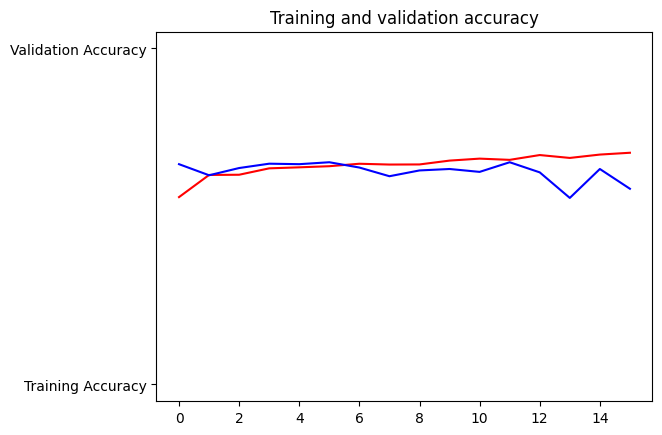

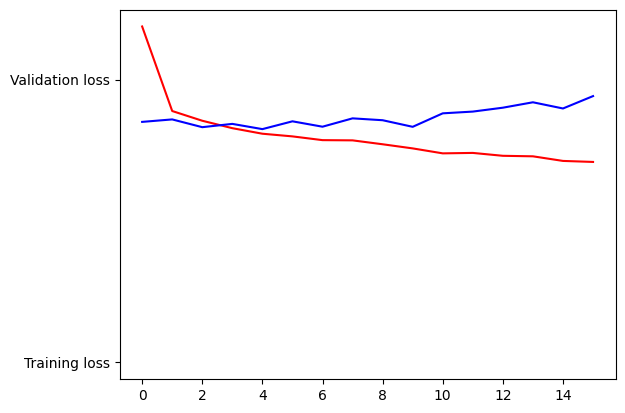

In [22]:
import matplotlib.pyplot as plt
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training loss")
plt.plot(epochs, val_loss, 'b', "Validation loss")
plt.show()

In [23]:
model.evaluate(test_batches)

 4/10 [===========>..................] - ETA: 28s - loss: 1.6369 - accuracy: 0.4414

KeyboardInterrupt: 

In [24]:
test_batches.class_indices

{'0-5': 0, '12-25': 1, '26-45': 2, '46-65': 3, '6-11': 4, '66-': 5}

In [25]:
class_name = ['0-5','12-25','26-45','46-65','6-11','>66']

In [46]:
import crop_image

In [32]:
model = tf.keras.models.load_model('../Models/age_models/4/')

In [55]:
model.history.

ValueError: Exception encountered when calling layer 'model_2' (type Functional).

Input 0 of layer "conv1" is incompatible with the layer: expected min_ndim=4, found ndim=0. Full shape received: ()

Call arguments received by layer 'model_2' (type Functional):
  • inputs=tf.Tensor(shape=(), dtype=int32)
  • training=None
  • mask=None

1/1 [==============================] - 0s 134ms/step
[[0.0081289  0.7536503  0.0505726  0.00611527 0.17891446 0.00261843]]
['0-5', '12-25', '26-45', '46-65', '6-11', '>66']
status :12-25


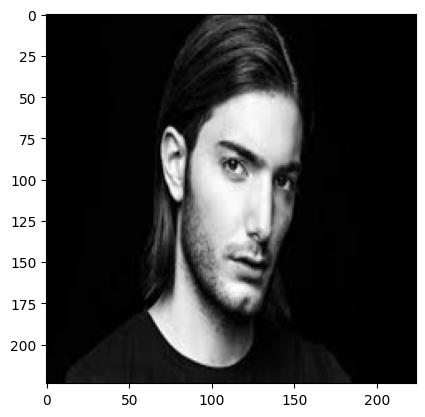

In [34]:
import matplotlib.pyplot as plt
import PIL
import numpy as np
img = PIL.Image.open('E:/download/11.jpeg')
img = img.resize((224,224))

image = np.array(img)/255.0
image = image.reshape((1,224,224,3))
predict = class_name[np.argmax(model.predict(image))]
print(model.predict(image))
print(class_name)
print(f'status :{predict}')
plt.imshow(img)

In [52]:
from retinaface import RetinaFace
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img =RetinaFace.extract_faces('E:/download/5.jpg',align=False)
#img2 = PIL.Image.open('E:/download/7.jpeg')
for face in img:
  face = Image.fromarray(face)
  #width, height = face.size
  ## adjust the margin as you like
  #margin = 0.00
  #left = int(width * -margin)
  #top = int(height * -margin)
  #right = int(width * (1 + margin))
  #bottom = int(height * (1 + margin))
#
  #face = img2.crop((left, top, right, bottom))
  face = face.resize((150, 150), Image.ANTIALIAS)

image = np.array(face)/255.0
image = image.reshape((1,150,150,3))
predict = class_name[np.argmax(model.predict(image))]
print(model.predict(image))
print(class_name)
print(f'status :{predict}')
plt.imshow(face)

ModuleNotFoundError: No module named 'retinaface'

In [10]:
!!pip install retinaface

['Collecting retinaface',
 '  Downloading retinaface-1.1.1-py3-none-any.whl (5.9 MB)',
 '     ---------------------------------------- 5.9/5.9 MB 624.6 kB/s eta 0:00:00',
 '  Downloading retinaface-1.1.0-py3-none-any.whl (5.9 MB)',
 '     ---------------------------------------- 5.9/5.9 MB 3.4 MB/s eta 0:00:00',
 '  Downloading retinaface-0.0.6-py3-none-any.whl (5.9 MB)',
 '     ---------------------------------------- 5.9/5.9 MB 2.8 MB/s eta 0:00:00',
 '  Downloading retinaface-0.0.5-py3-none-any.whl (5.9 MB)',
 '     ---------------------------------------- 5.9/5.9 MB 3.0 MB/s eta 0:00:00',
 '  Downloading retinaface-0.0.4-py3-none-any.whl (5.9 MB)',
 '     ---------------------------------------- 5.9/5.9 MB 2.7 MB/s eta 0:00:00',
 '  Downloading retinaface-0.0.3-py3-none-any.whl (5.9 MB)',
 '     ---------------------------------------- 5.9/5.9 MB 2.7 MB/s eta 0:00:00',
 '  Downloading retinaface-0.0.2-py3-none-any.whl (7.5 kB)',
 '  Downloading retinaface-0.0.1-py3-none-any.whl (7.